데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/A_B_testing

# 새로운 홈페이지가 기존 홈페이지 보다 좋을까요?

출처:
- https://docs.google.com/document/u/1/d/1aCquhIqsUApgsxQ8-SQBAigFDcfWVVohLEXcV6jWbdI/pub?embedded=True

<b>배경</b><br>
Udacity는 온라인 학습 콘텐츠를 만드는 회사입니다. 이 기업은 홈페이지에 '무료 체험'과 '강의 자료만 이용'이라는 버튼을 만들었습니다. 이 버튼을 누르게 되면 자신의 신용카드 정보를 입력한 뒤 2주간 유료 콘텐츠를 무료로 들을 수 있습니다. 2주 후에 수강 취소 버튼을 누르지 않는다면 강의비가 자동 결제 됩니다. '강의 자료만 이용' 버튼을 누르면 강의 비디오나 퀴즈를 무료로 이용할 수 있지만 유료 콘텐츠에 있는 학습 지도나 수강 이수증을 받을 수가 없습니다. <br>
<br>
Udacity는 '무료 체험'을 수강하고 중간에 포기하는 학생들을 보며 학생들이 중간에 포기하지 않게 하려면 어떤 시스템을 도입해야 할지 고민하다가 한 가지 시스템을 도입했습니다. 그것은 수강생이 '무료 체험' 버튼을 누르면 일주일에 강의에 얼마나 시간을 투자할 수 있는지 입력하게 하는 것이 었습니다. 만약 5시간 이상 투자할 수 있다고 답변하면 '무료 체험'을 바로 이용할 수 있습니다. 하지만 만약 5시간 이상 투자할 수 없다고 하면 Udacity 강의를 제대로 배우려면 시간을 많이 투자해야 하기 때문에 '강의 자료만 이용' 을 이용하도록 권유합니다. 수강생은 이 문구를 보고 '무료 체험'과 '강의 자료만 이용' 중 어떤 것을 선택할지 고민하게 됩니다. <br>
<br>
이 방법이 실제로 '무료 체험'을 누른 수강생의 학습 중도 포기율을 낮출 수 있는 효과가 있는지 실험을 해보기로 했습니다. 실험을 통제하기 위해 '무료 체험'에 동의한 수강생들의 아이디와 접속기록을 수집하고 '무료 체험'에 동의하지 않은 수강생의 정보는 수집하지 않았습니다. 그리고 같은 아이디로 같은 강의를 중복해서 수강할 수 없게 했습니다.<br>

<b>요약<br> </b>
<br> 
<b>실험 설계</b><br>
- 먼저 새로운 시트템을 도입한 (new page)와 기존의 페이지 (old page)로 나누어 실험을 진행
- 실험군(treatment)에게는 새로운 페이지(new page)로 수강 진행, 대조군(control)에게는 기존 페이지(old page)를 보여줌<br>

<b>목적</b><br>
- <u>새로운 시스템을 도입해서 기존 결제율은 유지하면서 열심히 안하는 학생 수는 줄이고 싶음</u>

# 1. 데이터 요약

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import os
os.chdir('C:/Users/bki19/Desktop/A_B_testing')
%matplotlib inline

In [2]:
df=pd.read_csv('./data/Final Project Baseline Values.csv',header=None)

<b>1) Data Summary</b><br>

In [3]:
df

,0,1
0,Unique cookies to view course overview page pe...,40000.000000
1,"Unique cookies to click ""Start free trial"" per...",3200.000000
2,Enrollments per day:,660.000000
3,"Click-through-probability on ""Start free trial"":",0.080000
4,"Probability of enrolling, given click:",0.206250
5,"Probability of payment, given enroll:",0.530000
6,"Probability of payment, given click",0.109313


제공된 데이터 요약을 정리하면 다음과 같습니다.<br>
<br>
Count<br>
- Unique cookies to view course overview page per day: 하루 평균 웹사이트 방문 수<br>
- Unique cookies to click "Start free trial" per day: 하루 평균 '무료 체험' 클릭 수<br>

Rate<br>
- Enrollments per day: 하루 평균 강의 등록 수<br>
- Click-through-probability on "Start free trial":  웹사이트 방문자 중 '무료 체험' 클릭 한 사람 비율 (CTR)<br>
- Probability of enrolling, given click: '무료 체험' 클릭을 한 사람 중 강의에 등록을 한 비율<br>
- Probability of payment, given enroll: 강의에 등록한 사람중 결제를 한 비율<br>
- Probability of payment, given click:  '무료 체험' 클릭을 한 사람 중 결제를 한 비율<br>

<b>2) 어떤 척도(Mesure)를 사용할 수 있을까?</b><br>
<br>
위 데이터 요약은 결국 다음 척도와 같습니다<br>
a) CTR (Click Thourgh Rate): $\frac{'무료 체험' 버튼 클릭한 사람 수}{총 방문자 수} =\frac{3200}{40000}=0.08 $<br>
b) Gross conversion (총 전환 비율): $\frac{클릭한 사람 중 강의 등록 수}{'무료 체험' 버튼 클릭한 사람 수}=\frac{660}{3200}=0.20625$<br>
c) Retention (유보율): $\frac{이주일간 수강 포기 안한 사람 수(결제 한 사람)}{강의 등록 한 사람 수}=\frac{X}{660}=0.5300$<br>
d) Net Conversion: $\frac{이주일간 수강 포기 안한 사람 수(결제 한 사람)}{'무료 체험' 버튼 클릭한 사람 수}=\frac{X}{3200}=0.109133$<br>
$X=이주일간 수강 포기 안한 사람 수(결제 한 사람)=약 350명$

<b>3) 분석 목적에 부합하는 척도 찾기</b><br>
<br>
기존 결제율은 비슷한가?<br>
=> 결제율에 관한 척도는 Retention, Net Conversion<br>
=> Retention, Net Conversion가 변화가 없는지 확인<br>
열심히 안하는 학생은 줄었는가?<br>
=> 열심히 안하는 학생이 수강 신청 안하면 강의 등록 수 감소<br>
=> Gross Conversion 감소했는지 확인

<b>4) 데이터의 수는 충분할까</b>

- 이 척도들을 활용하여 Normal 분포에서 신뢰 구간을 세우려면 각각 데이터가 얼마나 필요할까?
- 만약 Retention, Net Conversion, Gross Conversion에 대한 빈도가 모두 Binomial 분포를 따른다고 가정
- Binomial을 분포는 데이터가 많아지면 큰 수의 법칙에 따라 Normal 분포에 근사


1) 정규 분포를 이용: $n=\frac{z_{\alpha/2}^{2}}{4\epsilon^{2}}$<br>
2) Rule of Thumb 이용: $16\frac{\sigma^2}{\epsilon^{2}}$<br>
여기서 $\epsilon$은 허용하고자 하는 오차 범위<br>



In [4]:
from scipy.stats import norm

Gross_conversion=df[1][4]
Retention=df[1][5]
Net_conversion=df[1][6]

def Norm_size(alpha,eps):
    z=norm.ppf(1-alpha/2)
    n=(z**2)/(4*eps**2)
    return n
def rule_thumb(X,eps):
    var=X*(1-X)
    n=16*(var)/(eps**2)
    return n

data={'Real sample size': [3200,660,3200],'Normal':[Norm_size(0.05,0.05),Norm_size(0.05,0.05),Norm_size(0.05,0.05)],'Rule of Thumb':[rule_thumb(Gross_conversion,0.05),rule_thumb(Retention,0.05),rule_thumb(Net_conversion,0.05)] }
pd.DataFrame(data,index =['Gross conversion','Retention','Net conversion'])

,Real sample size,Normal,Rule of Thumb
Gross conversion,3200,384.145882,1047.750000
Retention,660,384.145882,1594.240000
Net conversion,3200,384.145882,623.124975


- 유의 수준 0.05에 오차를 5퍼센트까지 허용했을 때 세가지 척도 모두 Normal 분포의 inference를 사용하기에 충분했습니다.
- 하지만 <u>Rule of Thumb 관점에서 Retention 데이터가 너무 적었습니다.</u>
- 이미 Net conversion이 Retention에 관한 정보를 포함하고 있기 때문에 Gross conversion과 Net conversion을 척도로 사용하기로 했습니다

# 2. Frequentist Approach

- 이제 Control group과 Treatment group 간에 Gross Conversion과 Net Conversion의 차이가 있는지 확인해보겠습니다.
- 운영자가 기대하는 결과는 Net Conversion은 차이가 없고 Gross Conversion은 Treatment group이 더 낮은 것입니다.

In [5]:
import pandas as pd
Control=pd.read_csv('./data/Control.csv')
Control=Control.dropna()
Treatment=pd.read_csv('./data/Experiment.csv')
Treatment=Treatment.dropna()

In [6]:
#Data size
print(Control.shape)
print(Treatment.shape)

(23, 5)
(23, 5)


- 데이터는 실험군과 대조군의 일별 방문자 수, 클릭 수, 수강 수, 결제자 수 입니다.
- 마지막 2주의 데이터는 클릭 수 , 수강 수, 결제자 수의 정보가 없어 제거했습니다.

In [7]:
#Number of visitors for each group
print(Control['Pageviews'].sum())
print( Treatment['Pageviews'].sum())

212163
211362


두 그룹의 방문자 수가 거의 비슷한 것으로 보아 50퍼센트씩 랜덤하게 사용자를 실험군과 대조군으로 나눈 것으로 보입니다.

<b>1) 적절한 분석 방법은?</b>
- <u>두 그룹은 사실상 독립입니다. </u>왜냐하면 새로운 홈페이지를 보여줬을 때의 변화를 보여준 것이 아니라 각각의 그룹을 새로운 홈페이지를 보여준 그룹과 안 보여준 그룹으로 나눴기 때문입니다.
- 또한 홈페이지를 보여준 그룹의 행동이 안 보여준 그룹의 행동에 영향을 미칠 가능성이 거의 없습니다
- 따라서 paied test보다는 단순한 Two sample proportion Z test를 하는 것이 적절하다고 판단했습니다

<b>2) Two sample proportion Z test</b>

$H_{0}:p_{control}=p_{treatment}$<br>
$H_{a}:p_{control}\neq p_{treatment}$<br>

In [8]:
#Gross conversion
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
count1= np.array([Control['Enrollments'].sum(),Treatment['Enrollments'].sum()] )
nobs1 = np.array([Control['Clicks'].sum(),Treatment['Clicks'].sum()]  )
proportions_ztest(count1, nobs1)

(4.701830023753982, 2.578401033720593e-06)

In [9]:
#Net conversion
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
count2= np.array([Control['Payments'].sum(),Treatment['Payments'].sum()] )
nobs2 = np.array([Control['Clicks'].sum(),Treatment['Clicks'].sum()]  )
proportions_ztest(count2, nobs2)

(1.4192001144365733, 0.15584068262150205)

- Gross Conversion에서 p 값은 거의 0에 가까워 귀무 가설을 귀각할 수 있었습니다.<br>
 => 두 그룹의 <u>Gross Conversion은 차이가 있다</u>는 결과를 얻었습니다.<br>
- Net Conversion에서 p 값은 거의 0.166으로 유의수준 0.05하에 귀무 가설을 귀각할 수 없었습니다.<br>
 => 두 그룹의 <u>Net Conversion은 차이가 없다</u>는 결과를 얻었습니다. 

$H_{0}:p_{control}<p_{treatment}$<br>
$H_{a}:p_{control}>p_{treatment}$<br>

In [10]:
#Gross conversion (one-sided)
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

proportions_ztest(count1, nobs1,alternative='larger') #smaller p1<p2  #larger p1>p2

(4.701830023753982, 1.2892005168602965e-06)

- p-value가 매우 낮아 귀무가설을 기각하여 Treatment 그룹의 Gross conversion rate가 더 낮다는 결론을 얻었습니다.<br>
- 따라서 홈페이지를 개선한 뒤에 강의를 수강하는 비율이 낮아졌습니다

<전체적인 실험 결과 요약>
- 시스템 도입 후 Net conversion이 기존과 차이가 없어 결제율에 변화는 없었습니다.
- 또한 Gross conversion은 시스템 도입 후 낮아져 강의에 투자할 시간이 없는 학생의 수가 줄었을 가능성이 높습니다.
- 따라서 실험 결과는 시스템 도입으로 운영자의 의도가 성공했다는 것을 보여줍니다.

<b>3) 데이터가 충분했을까?</b>
- 앞에서 필요한 샘플 수를 계산했었지만 Two proportion 테스트를 위한 샘플을 계산한 것이 아니었습니다.
- Two proportion test를 위한 샘플 수를 계산해보고 데이터가 충분했는지 확인해보겠습니다.

출처: Wang, H. and Chow, S.-C. 2007. Sample Size Calculation for Comparing Proportions. Wiley Encyclopedia of Clinical Trials.<br>
<br>
$n= (z_{\alpha/2 }+z_{\beta })^{2} (\frac{p_{1}(1-p_{1})+p_{2}(1-p_{2})}{(p_{1}-p_{2})^2}) $<br>
각 그룹에 필요한 샘플의 최소 숫자

In [11]:
from scipy.stats import norm

def proportion_size(alpha,beta,p1,p2):
    za=norm.ppf(1-alpha/2)
    zb=norm.ppf(1-beta)
    n= ((za+zb)**2)* ( (p1*(1-p1)+p2*(1-p2)  )       / ((p1-p2)**2)     )
    return n

In [12]:
print(proportion_size(0.05,0.2, (count1[0]/nobs1[0]),(count1[1]/nobs1[1])  ))
print(nobs1[0]+nobs1[1])

6129.657118956933
34553


In [13]:
print(proportion_size(0.05,0.2, (count2[0]/nobs2[0]),(count2[1]/nobs2[1])  ))
print(nobs2[0]+nobs2[1])

67319.79953258364
34553


- Gross conversion은 6129개의 데이터가 필요하기 때문에 데이터의 수가 충분했습니다.
- Net conversion은 결제자 수가 적어 더 많은 데이터가 필요하여 67319개의 데이터가 필요하여 2배의 데이터가 필요했습니다.
- 하지만 샘플 수의 계산 결과는 필요한 데이터의 수에 대한 추천일 뿐 확정적인 것은 아닙니다.

<b>4) 실험의 일관성 테스트</b> 

- 만약 데이터가 충분하다면 데이터가 많이 쌓일 수록 점점 일관된 가설 검정 결과를 보여줄 것입니다
- 따라서 데이터를 하루 단위로 누적해서 p-value가 어떻게 변하는지 살펴 보았습니다 

In [14]:
#Gross conversion
T=Control.shape[0]
P_val=[]
N1=0
N2=0
X1=0
X2=0
for i in range(T):

    N1+=Control.iloc[i,2]
    N2+=Treatment.iloc[i,2]

    X1+=Control.iloc[i,3]
    X2+=Treatment.iloc[i,3]

    nobs = np.array([N1,N2] )
    count= np.array([X1,X2]  )
    Z,P=proportions_ztest(count, nobs,alternative='larger')
    P_val.append(P)


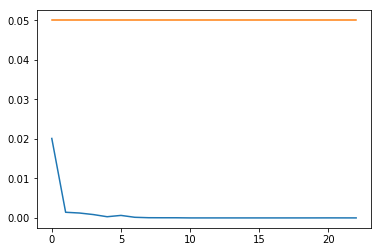

In [15]:
plt.plot(P_val)
plt.plot(np.ones(T)*0.05)

- 주확색 선은 유의 수준으로 0.05로 설정했습니다
- Gross conversion의 경우 날짜가 지날 수록 p-value가 점차 낮아져 일관 된게 귀무 가설을 기각할 수 있다는 결과를 얻었습니다.
- 샘플 사이즈를 계산했을 때도 Gross conversion의 데이터는 충분해보였고 샘플 사이즈 계산 결과에 상응하는 결과를 얻었습니다.
- 따라서 Treatment 그룹의 Gross conversion이 Control 그룹보다 낮다는 결과를 도출하기에 데이터가 충분해 보입니다.

In [16]:
#Net conversion
T=Control.shape[0]
P_val=[]
N1=0
N2=0
X1=0
X2=0
for i in range(T):

    N1+=Control.iloc[i,2]
    N2+=Treatment.iloc[i,2]

    X1+=Control.iloc[i,4]
    X2+=Treatment.iloc[i,4]

    nobs = np.array([N1,N2] )
    count= np.array([X1,X2]  )
    Z,P=proportions_ztest(count, nobs)
    P_val.append(P)


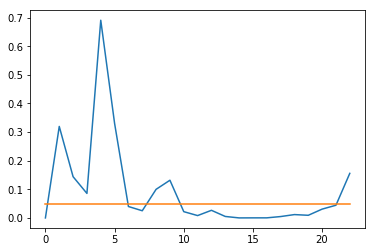

In [17]:
plt.plot(P_val)
plt.plot(np.ones(T)*0.05)

- 하지만 Net Conversion의 P-value의 변화가 컸습니다
- 특히 11일 부터 23일까지는 귀무가설을 기각할 수 있다가 최종일인 24일에는 기각할 수 없다는 결론을 얻었습니다.
- 23일에는 기각할 수 있고 24일에는 기각할 수 없다는 결과를 과연 신뢰할 수 있을까요?
- 샘플 사이즈 계산 시에도 데이터가 충분하지 않아 보였고 이 실험을 통해서도 테스트에 문제가 있다는 것을 볼 수 있었습니다.

# 3. Bayesian Approach

데이터 분포: $X_{j} \sim Binomial(n_{j},p_{j})$<br>
사전 분포: $p_{j} \sim Beta (\alpha_{j},\beta_{j})=Uniform (0,1)$<br>
사후 분포: $\theta_{j}|X_{j} \sim Beta(X_{j}+\alpha_{j},n_{j}-X_{j}+\beta_{j})$, j=Treatment, Control<br>
<br>
$p_{j}$가 Gross Conversion rate 또는 Net Conversion Rate의 확률이라고 가정했습니다.<br>
이 때 Control 그룹의 Gross Conversion rate 또는 Net Conversion Rate가 Treatment 그룹 보다 높을 확률을 계산 했습니다.: $P(p_{Control}>p_{Treatment})$

In [29]:
import numpy as np
from scipy.stats import beta
np.random.seed(0)


#Gross conversion
T=Control.shape[0]
N=100000

Prob=[]
N1=0
N2=0
X1=0
X2=0
for i in range(T):

    N1+=Control.iloc[i,2]
    N2+=Treatment.iloc[i,2]

    X1+=Control.iloc[i,3]
    X2+=Treatment.iloc[i,3]
    
    a1=1+X1
    b1=1+N1-X1

    a2=1+X2
    b2=1+N2-X2
    
    thetaA=np.random.beta(a1, b1,N)
    thetaB=np.random.beta(a2, b2,N)
    
    Prob.append(np.mean(thetaA>thetaB))

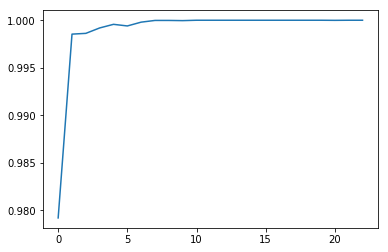

In [30]:
plt.plot(Prob)

- Gross Conversion rate에서 $P(p_{Control}>p_{Treatment})$의 확률을 추정한 결과 확연하게 Control 그룹이 높을 확률이 1에 가까울 정도로 높았습니다
- 이 결과는 Treatment 그룹의 Gross Conversion rate이 낮다는 이전의 분석과 같은 결론입니다

In [31]:
#Gross conversion

import numpy as np
from scipy.stats import beta
np.random.seed(0)

T=Control.shape[0]
N=1000000

Prob=[]
N1=0
N2=0
X1=0
X2=0
for i in range(T):

    N1+=Control.iloc[i,2]
    N2+=Treatment.iloc[i,2]

    X1+=Control.iloc[i,4]
    X2+=Treatment.iloc[i,4]
    
    a1=1+X1
    b1=1+N1-X1

    a2=1+X2
    b2=1+N2-X2
    
    thetaA=np.random.beta(a1, b1,N)
    thetaB=np.random.beta(a2, b2,N)
    
    Prob.append(np.mean(thetaA>thetaB))

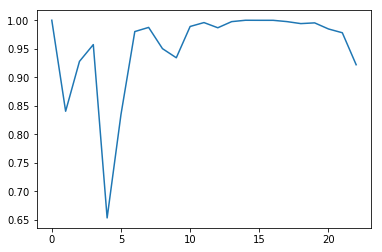

In [33]:
plt.plot(Prob)

- Net Conversion을 계산 했을 때 Frequentist의 p-value를 계산했을 때 처럼 변동성이 컸습니다.
- 하지만 변동성이 큼에도 불구하고 모든 구간에서 Control 그룹의 Net Converion이 Experiment보다 높았습니다.
- Frequentist에서는 두 그룹의 차이가 없다고 했는데 Bayesian 분석에서는 다른 결론을 얻었습니다

(array([3.60000e+01, 1.63300e+03, 2.58820e+04, 1.51747e+05, 3.49364e+05,
        3.24722e+05, 1.24744e+05, 2.04120e+04, 1.42000e+03, 4.00000e+01]),
 array([0.10103018, 0.10340293, 0.10577569, 0.10814844, 0.1105212 ,
        0.11289396, 0.11526671, 0.11763947, 0.12001222, 0.12238498,
        0.12475774]),
 <a list of 10 Patch objects>)

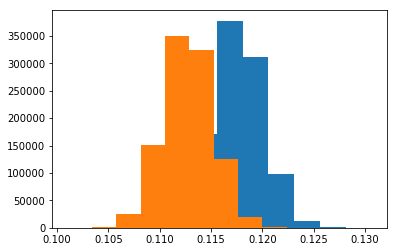

In [34]:
plt.hist(thetaA)
plt.hist(thetaB)

- 두 그룹의 사후 분포를 살펴 봤습니다
- 왼쪽은 Treatment 그룹의 Net Conversion rate 오른쪽은 Control 그룹으로 Control 그룹의 분포가 대체로 높습니다

# 4. 결론

- Frequentist 방법에서 Treatment 그룹의 Gross Conversion이 낮다는 결론
- Bayesian에서도 같은 결론
=> 홈페이지 개편 후 '무료 체험'을 클릭한 사람 중 강의를 수강한 사람의 비율이 낮아짐<br>
<br>
- Net Converison rate가 Frequentist 방법에서 두 그룹 간의 차이가 없음
- 하지만 Sample size 계산 했을 때 샘플이 충분하지 않을 가능성
- P-value가 일 단위로 변동이 심해 샘플이 충분하지 않을 가능성을 뒷받침하여 다른 접근 방법이 필요
- Bayesian 분석 결과 Treatment 그룹의 확률이 더 낮음
=> 홈페이지 개편 후 '무료 체험'을 클릭한 사람 중 포기를 안 한사람의 비율이 낮아짐<br>